<a href="https://colab.research.google.com/github/IgnacioZamoranoM/ProyectoGestionFinanciera/blob/main/ArbitrajeBlackScholes_SPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este cuaderno deriva la formula discreta de valoración de Black-Scholes para un periodo.
Usaremos la librería simbólica para la derivación algebraica general

In [ ]:
from sympy import *
init_printing()

La estructura financiera es la siguiente:

Dos periodos $t=0,1$ y 2 estados de la naturaleza en $t=1$: bueno (u) y malo (d)

Dos activos:
- libre de riesgo (bono) con valor inicial $B$ y retorno $\tilde r>1$
- riesgoso (acción) con valor inicial $S_0$ y retornos $u>1$ ó $1>d$

Derivado: opción de compra Europea de la acción (se ejerce solo al final)
- $K$ precio de ejercicio
- $S_1$ valor del activo al final
- $\max\{0,S_1-K\}$ retorno para $S_1\in\{uS_0,dS_0\}$

1. ¿Cuál es el precio de los activos no derivados?
- De esta forma el precio del bono es $B$ y el precio de la acción es $S_0$.
2. ¿Cuál es el retorno de los activos no derivados?
- El retorno del bono es $\tilde rB$ tanto en el estado bueno como en el estado malo
- El retorno de la acción es $uS_0$ en el estado bueno y $dS_0$ en el estado malo
3. ¿Cuál es el retorno de la opción?
- RESPONDER

Inicialmente nos concentraremos en los activos no derivados. Definimos $W=\left[-q'\atop R\right]$ donde los precios de los activos son $q=(q_1,q_2)=(B,S_0)$ y los retornos son $R=(R_1,R_2)$.
1. Encuentre la expresión de $R_1$ y $R_2$.
- RESPONDER
2. Encuentre $W$.
- RESPONDER


In [ ]:
# Parámetros Bono
r, B = symbols('r B')
# Parámetros Acción
u, d, S0 = symbols('u d S0')

In [ ]:
W = Matrix([[-B, -S0], [r*B, u*S0],[r*B, d*S0]])
W

⎡-B   -S₀ ⎤
⎢         ⎥
⎢B⋅r  S₀⋅u⎥
⎢         ⎥
⎣B⋅r  S₀⋅d⎦

El Teorema Fundamental de Valoración de Activos ([Harrison and Kreps (1979)](https://www.sciencedirect.com/science/article/pii/0022053179900437)) establece que la estructura financiera  es libre de arbitraje si y sólo si existe un $\pi\in\mathbb{R}^S_{++}$ tal que

(Condición) $[1,\pi']W=0$.

Para utilizar este resultado, definamos el vector $[1,\pi']$.

In [ ]:
pi_u, pi_d = symbols('pi_u pi_d')
pi = Matrix([[1],[pi_u],[pi_d]])
pi

⎡ 1 ⎤
⎢   ⎥
⎢πᵤ ⎥
⎢   ⎥
⎣π_d⎦

Reemplazando en la (Condición) obtenemos el siguiente sistema de ecuaciones:

In [ ]:
NA=pi.transpose()*W
NA

[B⋅π_d⋅r + B⋅πᵤ⋅r - B  S₀⋅d⋅π_d + S₀⋅πᵤ⋅u - S₀]

Podemos utilizar un _solver_ algebraico para encontrar expresiones generales de $\pi_1$ y $\pi_2$ en función de los parámetros $u,d$ y $r$:

In [ ]:
# Solver tutorial
# https://docs.sympy.org/latest/modules/solvers/solvers.html
piNA=solve([NA[0],NA[1]],[pi_u,pi_d],dict=True)
piNA

⎡⎧       -r + u          -d + r  ⎫⎤
⎢⎨π_d: ──────────, πᵤ: ──────────⎬⎥
⎣⎩     -d⋅r + r⋅u      -d⋅r + r⋅u⎭⎦

## Inclusión del derivado

Ahora extendamos la matriz $W$ para incorporar la opción.

1. Encuentre la expresión para $W$ agregando los retornos y el precio de la opción denotado por $q_3$.

In [ ]:
# Parámetros Opción
q3 = 2.75
K = 560
# Parámetros Bono
r, B = 1.0343, 100.88
# Parámetros Acción
u, d, S0 = 1.003, 0.9969, 562.01
W = Matrix([[-B, -S0, -q3], [r*B, u*S0, max(0,u*S0-K)],[r*B, d*S0, max(0,d*S0-K)]])
W

⎡ -100.88     -562.01          -2.75      ⎤
⎢                                         ⎥
⎢104.340184  563.69603   3.69602999999995 ⎥
⎢                                         ⎥
⎣104.340184  560.267769  0.267769000000044⎦

Utilice la (Condición) del Teorema Fundamental reemplazando los valores encontrados anteriormente para $\pi$ para definir una expresión para $q_3$.

In [ ]:
u,r,d = symbols('u r d')
Prices=Matrix([[1],[piNA[0][pi_u]],[piNA[0][pi_d]]]).transpose()*W
Prices

⎡104.340184⋅(-d + r)   104.340184⋅(-r + u)           563.69603⋅(-d + r)   560.267769⋅(-r + u)      ↪
⎢─────────────────── + ─────────────────── - 100.88  ────────────────── + ─────────────────── - 56 ↪
⎣    -d⋅r + r⋅u            -d⋅r + r⋅u                    -d⋅r + r⋅u           -d⋅r + r⋅u           ↪

↪       3.69602999999995⋅(-d + r)   0.267769000000044⋅(-r + u)       ⎤
↪ 2.01  ───────────────────────── + ────────────────────────── - 2.75⎥
↪              -d⋅r + r⋅u                   -d⋅r + r⋅u               ⎦

In [ ]:
Prices.subs([(d,0.5),(u,1.5),(r,0.01)])

[10333.1384  55296.782111  -143.957888999991]

## Aplicación (Grupos)

Encuentre valores de $r,B,u,d,S_0$ para valorar una opción.

In [ ]:
import math
from scipy.stats import norm


def modelo_black_scholes(S0, K, T, r, sigma):

    d1 = (math.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    Nd1 = norm.cdf(d1)
    Nd2 = norm.cdf(d2)

    precio = (S0 * Nd1) - (K * math.exp(-r * T) * Nd2)

    return precio


S0 = 562.01
K = 560
T = 0.0079
r = 0.0343
volatilidad = 0.0957  # days range


resultado = modelo_black_scholes(S0, K, T, r, volatilidad)


print(f"{ resultado:.2f} USD")


3.18 USD


[*********************100%***********************]  1 of 1 completed


El retorno anualizado promedio del SPY es: 17.05%


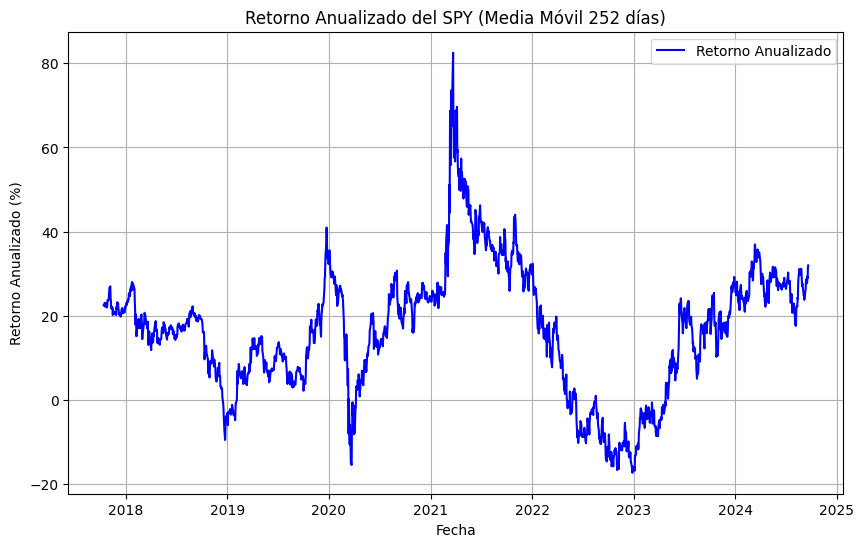

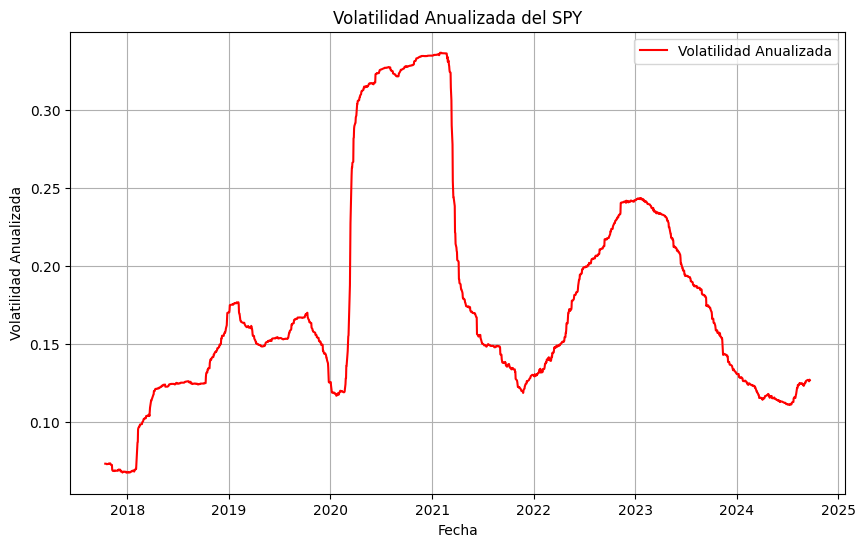

In [1]:

!pip install yfinance


import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


data = yf.download('SPY', start='2016-10-13', end='2024-10-14')


data['Daily Return'] = data['Adj Close'].pct_change()


retorno_anualizado = (1 + data['Daily Return'].mean())**252 - 1
print(f"El retorno anualizado promedio del SPY es: {retorno_anualizado * 100:.2f}%")


data['Volatility'] = data['Daily Return'].rolling(window=252).std() * (252**0.5)

# Retorno Anualizado
plt.figure(figsize=(10, 6))
plt.plot(data.index, ((1 + data['Daily Return'].rolling(window=252).mean())**252 - 1) * 100,
         label='Retorno Anualizado', color='blue')
plt.title('Retorno Anualizado del SPY ')
plt.xlabel('Fecha')
plt.ylabel('Retorno Anualizado (%)')
plt.legend()
plt.grid(True)
plt.show()


# Volatilidad Anualizada
plt.figure(figsize=(10,6))
plt.plot(data.index, data['Volatility'], label='Volatilidad Anualizada', color='red')
plt.title('Volatilidad Anualizada del SPY')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad Anualizada')
plt.legend()
plt.grid(True)
plt.show()


# Anexo
Para más manipulaciones simbólicas ver [este cuaderno.](https://colab.research.google.com/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-5-Sympy.ipynb#scrollTo=GzKR97oUjW8T)